In [53]:
# import image libraries
from PIL import Image
import tempfile

# create image with given size in inches and given dpi
def create_image(width, height, dpi):
    # create image with given size in inches and given dpi
    image = Image.new('RGB', (int(width * dpi), int(height * dpi)), (255, 255, 255))
    return image

def set_image_dpi(image, dpi):
    """
    Rescaling image to 300dpi without resizing
    :param image: An image
    :return: A rescaled image
    """
    image_resize = image
    temp_file = tempfile.NamedTemporaryFile(delete=False, suffix='.png')
    temp_filename = temp_file.name
    image_resize.save(temp_filename, dpi=(dpi, dpi))
    return temp_filename

In [32]:
IMAGE_WIDTH_INCHES = 6
IMAGE_HEIGHT_INCHES = 4
IMAGE_DPI = 600
image_width_px = IMAGE_WIDTH_INCHES * IMAGE_DPI
CPI = 49.66
num_colums = CPI*IMAGE_WIDTH_INCHES
px_per_column = image_width_px / num_colums
COLOR1 = (255, 0, 0)
COLOR2 = (0, 0, 255)
NUM_COLORS = 2

px_per_color = px_per_column/NUM_COLORS

In [33]:
im = create_image(IMAGE_WIDTH_INCHES, IMAGE_HEIGHT_INCHES, IMAGE_DPI)


In [34]:
def add_stripes(im, color1, color2, num_colors, px_per_column):
    # add stripes to image
    for x in range(im.width):
        for y in range(im.height):
            if x % px_per_column < px_per_column/num_colors:
                im.putpixel((x, y), color1)
            else:
                im.putpixel((x, y), color2)
    return im

In [35]:
im = add_stripes(im, COLOR1, COLOR2, NUM_COLORS, px_per_column)

In [36]:
im.save('../figures/two-way-image-49_66.png')

In [43]:
def weave_images_together(im1_path,im2_path,px_per_column):
    # load two images from jpeg files
    im1 = Image.open(im1_path)
    im2 = Image.open(im2_path)
    # weave images together
    im = Image.new('RGB', (im1.width, im1.height), (255, 255, 255))
    for x in range(im.width):
        for y in range(im.height):
            if x % px_per_column < px_per_column/2:
                im.putpixel((x, y), im1.getpixel((x, y)))
            else:
                im.putpixel((x, y), im2.getpixel((x, y)))
    return im

im_weave = weave_images_together('../figures/yawn_a.JPG','../figures/yawn_b.JPG',px_per_column)

In [47]:
im_weave.save('../figures/yawn_merge.pdf')

'/var/folders/6z/pdw64t7n37x_ptgsykdgnp4m0000gq/T/tmpcjd1ya2g.png'

In [56]:
im_path = set_image_dpi(im_weave,IMAGE_DPI)
#open image from path
im = Image.open(im_path)
im.save('../figures/yawn_merge_dpi.png',dpi=(IMAGE_DPI,IMAGE_DPI))

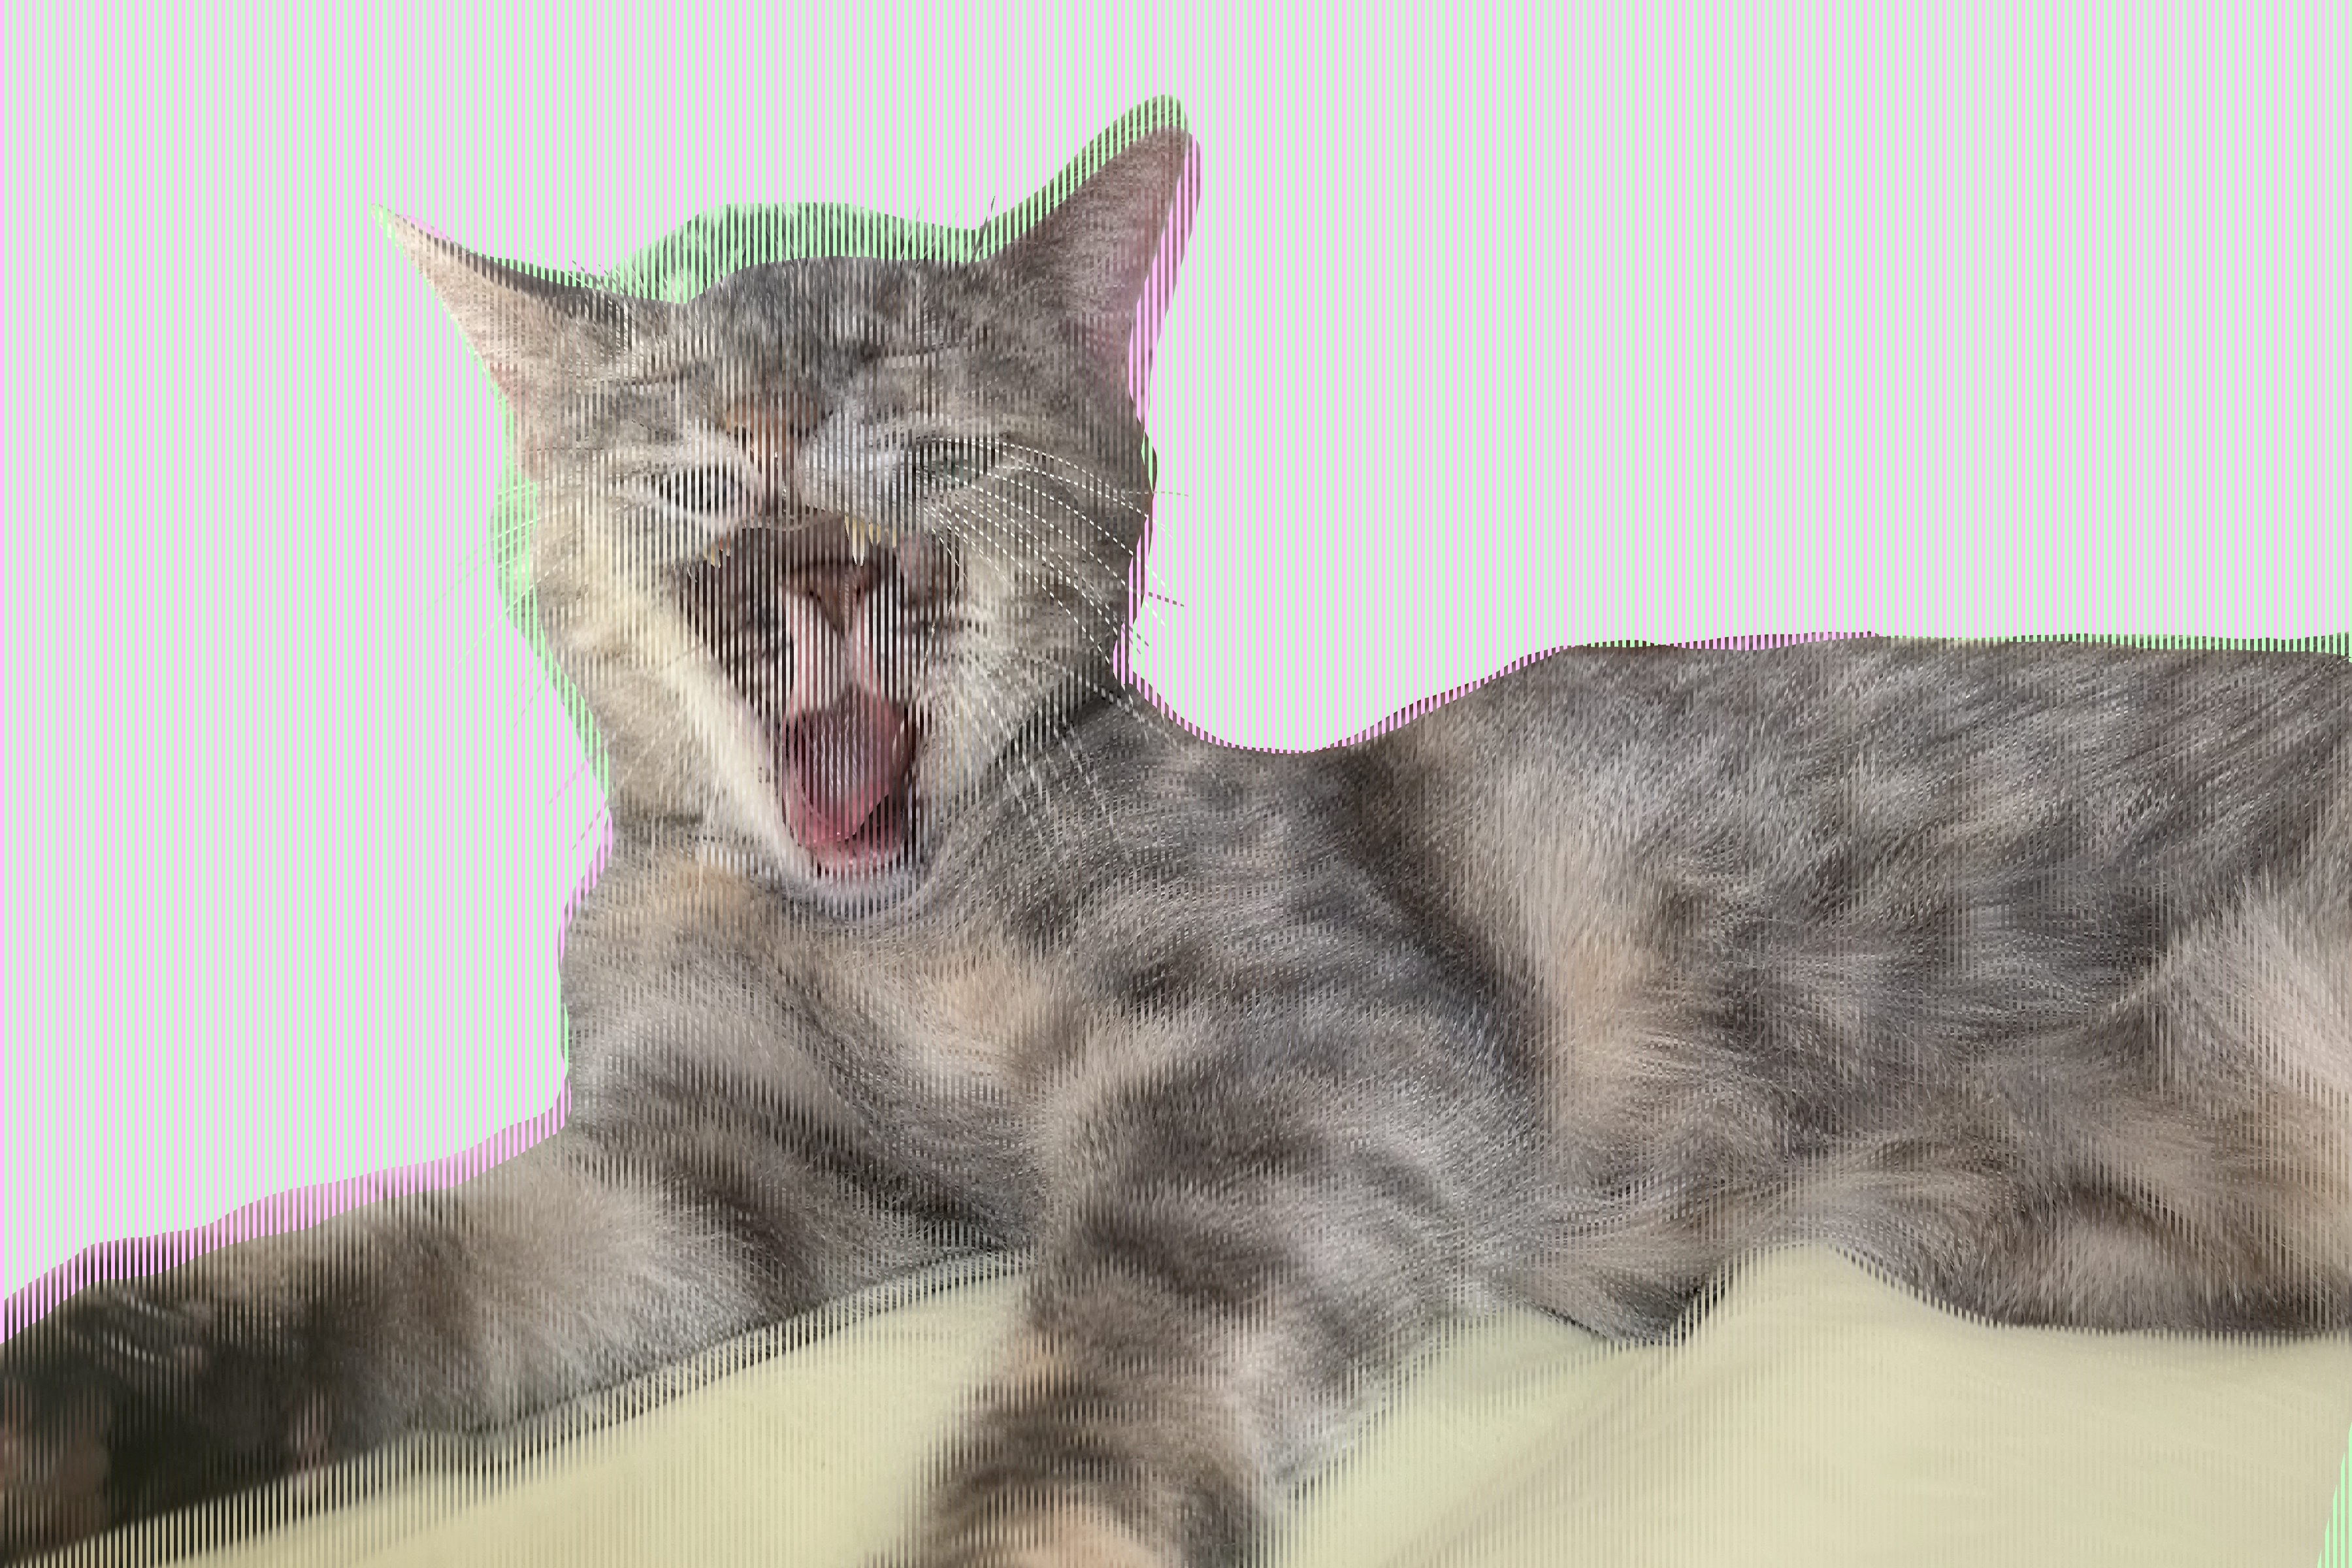

In [51]:
im

In [19]:
arr = np.array(im)

In [30]:
arr[0:14,0:20,0]

array([[255, 255, 255, 255, 255, 255,   0,   0,   0,   0,   0,   0, 255,
        255, 255, 255, 255, 255,   0,   0],
       [255, 255, 255, 255, 255, 255,   0,   0,   0,   0,   0,   0, 255,
        255, 255, 255, 255, 255,   0,   0],
       [255, 255, 255, 255, 255, 255,   0,   0,   0,   0,   0,   0, 255,
        255, 255, 255, 255, 255,   0,   0],
       [255, 255, 255, 255, 255, 255,   0,   0,   0,   0,   0,   0, 255,
        255, 255, 255, 255, 255,   0,   0],
       [255, 255, 255, 255, 255, 255,   0,   0,   0,   0,   0,   0, 255,
        255, 255, 255, 255, 255,   0,   0],
       [255, 255, 255, 255, 255, 255,   0,   0,   0,   0,   0,   0, 255,
        255, 255, 255, 255, 255,   0,   0],
       [255, 255, 255, 255, 255, 255,   0,   0,   0,   0,   0,   0, 255,
        255, 255, 255, 255, 255,   0,   0],
       [255, 255, 255, 255, 255, 255,   0,   0,   0,   0,   0,   0, 255,
        255, 255, 255, 255, 255,   0,   0],
       [255, 255, 255, 255, 255, 255,   0,   0,   0,   0,   0,  